In [1]:
!pip install tensorflow

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip "/content/drive/MyDrive/thesis_dataset/6_banana_dataset.zip"


Streaming output truncated to the last 5000 lines.
  inflating: banana_dataset/Bari_2/IMG_20230822_111155_3.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111155_4.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111159_0.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111159_1.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111159_2.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111159_3.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111159_4.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111202_0.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111202_1.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111202_2.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111202_3.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111202_4.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111204_0.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111204_1.jpg  
  inflating: banana_dataset/Bari_2/IMG_20230822_111204_2.jpg  
  in

In [5]:
import os
path = '/content/banana_dataset'
for x, y, z in os.walk(path):
  print(x)
  print(y)
  print(len(z))

/content/banana_dataset
['Bari_3', 'Bari_2', 'Bari_1', 'Red_Dacca', 'Bari_4', 'Shobri_Cola']
0
/content/banana_dataset/Bari_3
[]
1464
/content/banana_dataset/Bari_2
[]
1000
/content/banana_dataset/Bari_1
[]
1385
/content/banana_dataset/Red_Dacca
[]
930
/content/banana_dataset/Bari_4
[]
1185
/content/banana_dataset/Shobri_Cola
[]
830


Save augmented Images ai 512x512x3

> Indented block

> Indented block





In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

import cv2
# load and resize images by into (fraction*W x fraction*H) lower resulation
def load_image(img):
  img = cv2.imread(img)
  return img

# Resize image
# def reshape_image(img, IMG_SIZE):
#   img = load_image(img)
#   img = cv2.resize(img, (IMG_SIZE,IMG_SIZE), interpolation = cv2.INTER_AREA)
#   img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#   img = np.array(img / 255.)
#   img = img.astype('float32')
#   return img
import tensorflow as tf
import tensorflow.keras.layers as layers
IMG_SIZE = 512

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  # layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomBrightness(.2),
  layers.RandomCrop(height=480, width=480),
  layers.RandomZoom(.2),
  layers.RandomTranslation(.2,.2)
])

In [7]:
import os
from PIL import Image
listdir =['Bari_4', 'Bari_1', 'Red_Dacca', 'Bari_2', 'Shobri_Cola', 'Bari_3']

for l in listdir:
  for x, y, z in os.walk("/content/banana_dataset/"+str(l)):
    print(x,'',z)
    for img in z:
      for i in range(5):
        imageArray = data_augmentation(resize_and_rescale(load_image(str(x)+'/'+str(img))))
        state = os.path.exists(l)
        if state==False:
          os.mkdir(l)
        cv2.imwrite(l+'/'+str(img[:img.find('.')]+'_'+str(i)+'.jpg'), np.array(imageArray))



/content/banana_dataset/Bari_4  ['IMG_20230826_161111_2.jpg', 'IMG_20230902_220829_0.jpg', 'IMG_20230826_161208_4.jpg', 'IMG_20230826_161245_0.jpg', 'IMG_20230826_155727_2.jpg', 'IMG_20230826_155453_3.jpg', 'IMG_20230826_161013_0.jpg', 'IMG_20230826_160955_4.jpg', 'IMG_20230826_163955_1.jpg', 'IMG_20230826_160425_4.jpg', 'IMG_20230826_161038_1.jpg', 'IMG_20230826_163934_2.jpg', 'IMG_20230826_160630_0.jpg', 'IMG_20230826_161152_3.jpg', 'IMG_20230902_220806_1.jpg', 'IMG_20230826_160513_0.jpg', 'IMG_20230826_163617_0.jpg', 'IMG_20230826_163547_0.jpg', 'IMG_20230826_160054_2.jpg', 'IMG_20230826_160525_3.jpg', 'IMG_20230826_160318_3.jpg', 'IMG_20230826_163808_4.jpg', 'IMG_20230826_160152_1.jpg', 'IMG_20230826_160318_1.jpg', 'IMG_20230826_163617_1.jpg', 'IMG_20230826_160944_1.jpg', 'IMG_20230826_155838_2.jpg', 'IMG_20230826_160406_0.jpg', 'IMG_20230826_161221_2.jpg', 'IMG_20230826_155740_1.jpg', 'IMG_20230826_155354_1.jpg', 'IMG_20230826_160152_3.jpg', 'IMG_20230826_155526_0.jpg', 'IMG_20230

In [ ]:
# _ = plt.imshow(result)

In [8]:
import cv2
import glob
import os
import numpy as np

SIZE = 224  #Resize images

#Capture training data and labels into respective lists
dataset = []
labels = []
count = 0

for directory_path in glob.glob("/content/banana_dataset/*"):
    label =  os.path.basename(directory_path)
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):

      img = cv2.imread(img_path, cv2.IMREAD_COLOR)

      if img is not None:
        img = cv2.resize(img, (SIZE, SIZE),interpolation=cv2.INTER_AREA)
        dataset.append(img)
        labels.append(label)

      else:
        continue


# #Convert lists to arrays
dataset = np.array(dataset)
labels = np.array(labels)

print('\nThe shape of images dataset : ',dataset.shape)
print("The shape of images labels : ",labels.shape)

Bari_3
Bari_2
Bari_1
Red_Dacca
Bari_4
Shobri_Cola

The shape of images dataset :  (6794, 224, 224, 3)
The shape of images labels :  (6794,)


In [ ]:
# import cv2
# import glob
# import os
# import numpy as np
# from keras.preprocessing.image import ImageDataGenerator
# from sklearn.utils import shuffle

# import warnings
# warnings.filterwarnings("ignore")

# SIZE = 224
# SCALE = 1 / 255.0
# num_augmentations = 9

# datagen = ImageDataGenerator(
#     rotation_range=0.2,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     brightness_range=None,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
# )

# dataset = []
# labels = []

# # Loop through class directories
# for directory_path in glob.glob("/content/banana_dataset/*"):
#     label = os.path.basename(directory_path)
#     print(label)

#     image_paths = glob.glob(os.path.join(directory_path, "*.jpg"))
#     image_paths = shuffle(image_paths)  # Shuffle image paths for better mixing

#     for img_path in image_paths:
#         img = cv2.imread(img_path, cv2.IMREAD_COLOR)
#         if img is not None:
#             img = cv2.resize(img, (SIZE, SIZE), interpolation=cv2.INTER_AREA)
#             img = img * SCALE
#             img = np.expand_dims(img, axis=0)  # Add batch dimension

#             # Generate augmented images on-the-fly and append
#             augmented_images = datagen.flow(img, batch_size=num_augmentations)
#             augmented_images = augmented_images.next()
#             dataset.extend(augmented_images)
#             labels.extend([label] * num_augmentations)

# # Convert lists to arrays
# dataset = np.array(dataset)
# labels = np.array(labels)

# print('\nThe shape of images dataset after augmentation:', dataset.shape)
# print('The shape of images labels after augmentation:', labels.shape)


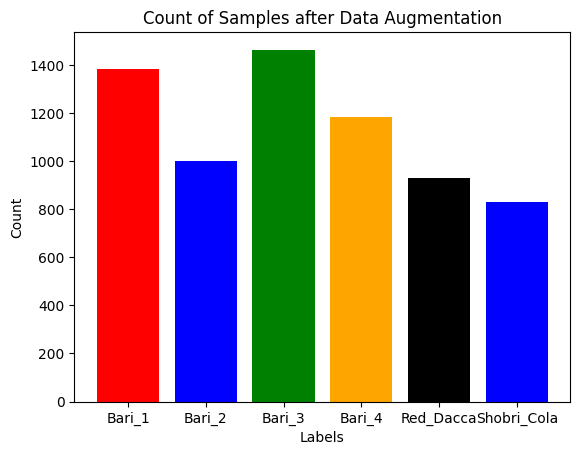

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = np.unique(labels, return_counts=True)

# Extract the unique labels and their corresponding counts
unique_labels = label_counts[0]
label_counts = label_counts[1]

# Calculate the percentage of each label
label_percentages = (label_counts / len(labels)) * 100

# Define colors for each label
colors = ['red', 'blue', 'green', 'orange', 'black', 'blue']

# Create a bar plot with different colors for each label
plt.bar(unique_labels, label_counts, color=colors)

# # Display the percentage on top of each bar
# for i, count in enumerate(label_counts):
#     percentage = label_percentages[i]
#     plt.text(unique_labels[i], count, f'{percentage:.2f}%', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Samples after Data Augmentation')

# Display the plot
plt.show()

In [10]:
from sklearn.utils import shuffle

# Assuming having features (X) and labels (y) arrays
X, y = shuffle(dataset, labels, random_state=42)

split_ratio = 0.8  # Specify the desired split ratio
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# encode labels from text to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
le.fit(y_test)

y_train = le.transform(y_train)
y_test = le.transform(y_test)


# One Hot Encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



print(f'{X_train.shape[0]} samples for training.')
print(f'{X_test.shape[0]} samples for testing.')

5435 samples for training.
1359 samples for testing.


In [ ]:
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras import Model, backend as k
from keras import optimizers
k.clear_session()

input_layer = Input(shape = (SIZE, SIZE, 3))

#CNN Convolutional Layers


#One-block model has two single convolutional layer with 32, 16 filters followed
#by a max pooling layer.

conv1 = Conv2D(32, (3, 3), activation = 'relu', padding = 'same' )(input_layer)
conv2 = Conv2D(16, (3, 3), activation = 'relu', padding = 'same' )(conv1)
pooling_layer = MaxPool2D(pool_size = (2, 2))(conv2)

#FC Fully Connected layers for classification with one flatten, one dense
# and one dropout layer,
flatten_layer = Flatten()(pooling_layer)
dense = Dense(200, activation='relu')(flatten_layer)
dropout = Dropout(0.5)(dense)

# ouput layer with “softmax” activation function.
output_layer = Dense(4, activation='softmax')(dropout)

model1 = Model(inputs =input_layer, outputs = output_layer)

# Compiling the model
model1.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 16)      4624      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 200)               40141000  
                                                             

In [ ]:
import tensorflow as tf

In [ ]:
#Load model without classifier/fully connected layers

from keras.applications.vgg16 import VGG16

VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights

# the fine_tune variable is to unfreeze the last layers during training.
fine_tune = 0

# here i am not unfreezing the last layer but you can unfreeze it when it required.
if fine_tune > 0:
        for layer in VGG_model.layers[:-fine_tune]:
            layer.trainable = False
else:
    for layer in VGG_model.layers:
        layer.trainable = False

VGG_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
# from tensorflow.keras  import losses
# from keras import backend as k
# from keras.models import Model
# from keras.layers import Dense, BatchNormalization, Dropout, Flatten

# k.clear_session() # clear model number


# # Create a new 'top' of the model (i.e. fully-connected layers).

# # This is 'bootstrapping' a new top_model onto the pretrained layers.

# n_classes = 5 # no of output classes

# # sequential keras model and just two dense layer, two BatchNormalization layer
# # and two dropout layer.

# VGG16_base = VGG_model.output
# flatten = Flatten(name="flatten")(VGG16_base)

# dense1 = Dense(512, activation='relu')(flatten)
# BatchNorm1 = BatchNormalization(axis = -1)(dense1)
# dropout1 = Dropout(0.5)(BatchNorm1)

# dense2 = Dense(256, activation='relu')(dropout1)
# BatchNorm2 = BatchNormalization(axis = -1)(dense2)
# dropout2 = Dropout(0.2)(BatchNorm2)


# output_layer = Dense(n_classes, activation='softmax')(dropout2)

# # Group the convolutional base and new fully-connected layers into a Model object.
# model = Model(inputs=VGG_model.input, outputs=output_layer)

# # Compiles the model for training.
# model.compile(optimizer='adam', loss=losses.CategoricalCrossentropy(), metrics=tf.keras.metrics.CategoricalAccuracy())

# # Check model summary
# # print(model.summary())

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy

n_classes = 6 # no of output classes

# Load the pretrained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model (if needed)
for layer in base_model.layers:
    layer.trainable = False

# Create a new top model
flatten = layers.Flatten()(base_model.output)
dense1 = layers.Dense(512, activation='relu')(flatten)
batch_norm1 = layers.BatchNormalization()(dense1)
dropout1 = layers.Dropout(0.5)(batch_norm1)
dense2 = layers.Dense(256, activation='relu')(dropout1)
batch_norm2 = layers.BatchNormalization()(dense2)
dropout2 = layers.Dropout(0.2)(batch_norm2)
output_layer = layers.Dense(n_classes, activation='softmax')(dropout2)

# Combine the base model and the new top model
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=[CategoricalAccuracy()])

# Print the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
history1 = model.fit(X_train,y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test) )

Epoch 1/10
192/192 [==============================] - 51s 174ms/step - loss: 0.7044 - categorical_accuracy: 0.7535 - val_loss: 0.4144 - val_categorical_accuracy: 0.8515
Epoch 2/10
192/192 [==============================] - 29s 150ms/step - loss: 0.2249 - categorical_accuracy: 0.9200 - val_loss: 0.2205 - val_categorical_accuracy: 0.9294
Epoch 3/10
192/192 [==============================] - 30s 155ms/step - loss: 0.1319 - categorical_accuracy: 0.9539 - val_loss: 0.2713 - val_categorical_accuracy: 0.9103
Epoch 4/10
192/192 [==============================] - 30s 155ms/step - loss: 0.0854 - categorical_accuracy: 0.9704 - val_loss: 0.3002 - val_categorical_accuracy: 0.9015
Epoch 5/10
192/192 [==============================] - 32s 165ms/step - loss: 0.0723 - categorical_accuracy: 0.9735 - val_loss: 0.2757 - val_categorical_accuracy: 0.9118
Epoch 6/10
192/192 [==============================] - 30s 154ms/step - loss: 0.0587 - categorical_accuracy: 0.9796 - val_loss: 0.2892 - val_categorical_acc

In [ ]:
print("Test_Accuracy of VGG-16: {:.2f}%".format(model.evaluate(X_test, y_test)[1]*100))

data1 = model.evaluate(X_test, y_test)[1]*100

22/22 [==============================] - 3s 130ms/step - loss: 0.2710 - categorical_accuracy: 0.9221
Test_Accuracy of VGG-16: 92.21%
22/22 [==============================] - 3s 132ms/step - loss: 0.2710 - categorical_accuracy: 0.9221


In [ ]:
# !zip -r "/content/file.zip" "/content/Shobri_Cola"

# from google.colab import files
# files.download("/content/file.zip")

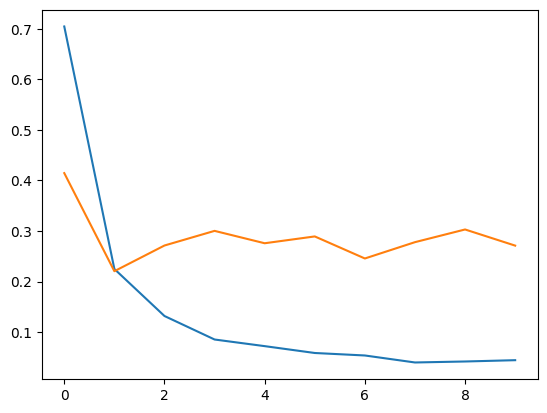

In [ ]:
# plot loss
from matplotlib import pyplot
pyplot.plot(history1.history['loss'], label='train_los')
pyplot.plot(history1.history['val_loss'], label='test_los')

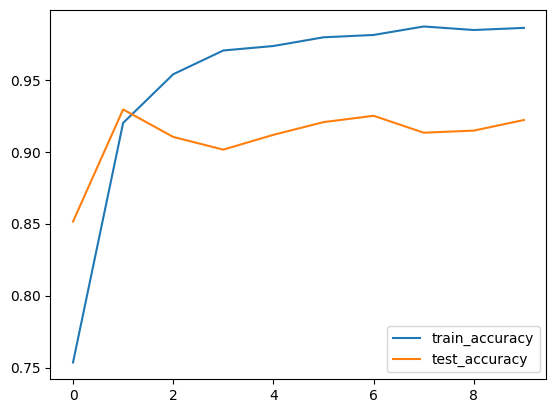

In [ ]:
pyplot.plot(history1.history['categorical_accuracy'], label='train_accuracy')
pyplot.plot(history1.history['val_categorical_accuracy'], label='test_accuracy')
pyplot.legend()
pyplot.show()

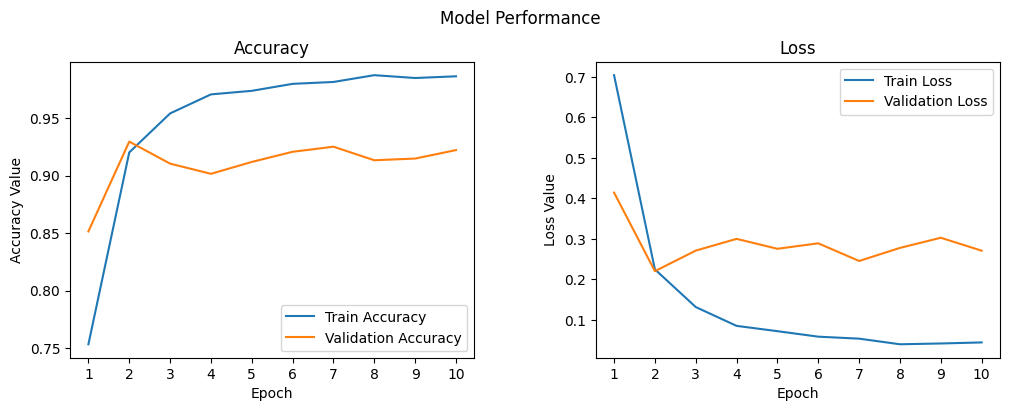

In [ ]:
from matplotlib import pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history1.history['categorical_accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history1.history['categorical_accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history1.history['val_categorical_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history1.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history1.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

['Bari_4', 'Bari_1', 'Red_Dacca', 'Bari_2', 'Shobri_Cola', 'Bari_3']
Generating True Vector:
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

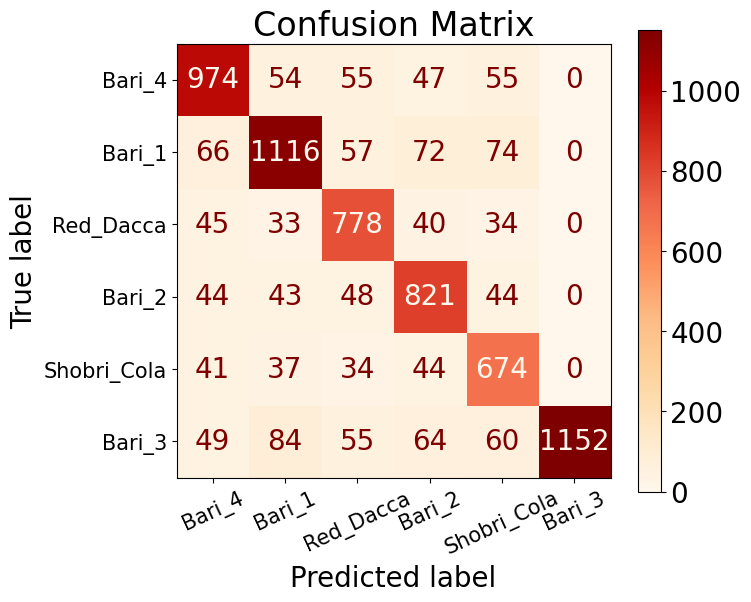

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import os


# Defining list with labels
labels = ['Bari_4', 'Bari_1', 'Red_Dacca', 'Bari_2', 'Shobri_Cola', 'Bari_3']


y_true = []
path = '/content/banana_dataset'
for x, y, z in os.walk(path):
  if len(z) == 0:
      continue
  x = x.split('/')
  index = labels.index(x[-1])
  for j in range(1, len(z)+1, 1):
    y_true.append(index)

print(labels)
print("Generating True Vector:\n", y_true, "\n")
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)
print('classes indexes:' , classesIndexes)
print('classes frequency:', classesFrequency)

y_predicted = np.copy(y_true)

ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)
for i in ii:
    y_predicted[i] = np.random.randint(low=0, high=5, dtype=int)

c_m = confusion_matrix(y_true, y_predicted)
print("\nConfusion Matrix:\n", c_m, "\n\n\n")


%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (7.0, 6.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)

# Showing the plot
plt.show()

In [ ]:
confusion_matrix_graph = confusion_matrix(y_true, y_predicted)
classification_matrix_report = classification_report(y_true, y_predicted)
print("\nClassification Report:\n", classification_matrix_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1185
           1       0.82      0.81      0.81      1385
           2       0.76      0.84      0.80       930
           3       0.75      0.82      0.79      1000
           4       0.72      0.81      0.76       830
           5       1.00      0.79      0.88      1464

    accuracy                           0.81      6794
   macro avg       0.81      0.81      0.81      6794
weighted avg       0.82      0.81      0.81      6794



22/22 [==============================] - 4s 132ms/step


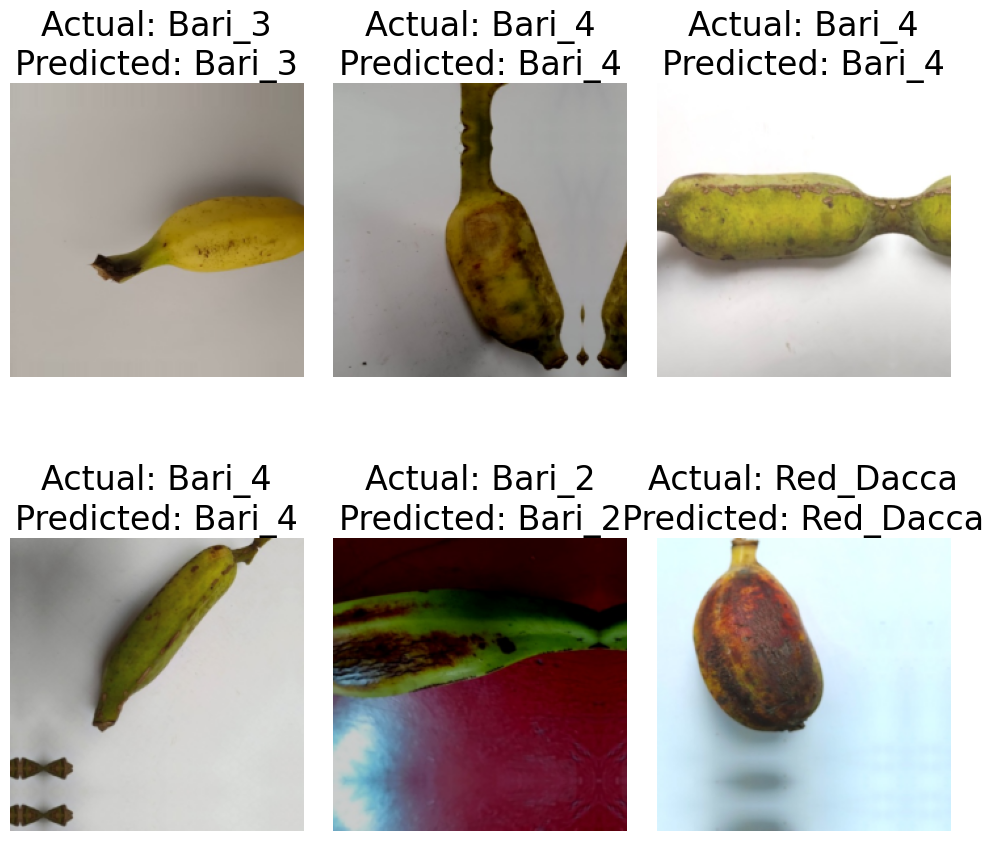

In [ ]:
# Let’s show some good predictions from transfer model.

import numpy as np
import matplotlib.pyplot as plt

# predict the labels agianst x_test
y_predict = model.predict(X_test)

# Reverse label encoding
reverse_encoded_labels = le.inverse_transform(np.argmax(y_test, axis=1))

# Reverse one-hot encoding for predicted labels
reverse_predicted_labels = le.inverse_transform(np.argmax(y_predict, axis=1))

# Plotting images with labels
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# Convert BGR image to RGB

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB))
    ax.set_title(f'Actual: {reverse_encoded_labels[i]}\nPredicted: {reverse_predicted_labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

## Xception Model

In [ ]:
# ### Using Xception Model
from tensorflow.keras.applications import Xception

# Load the pretrained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model (if needed)
for layer in base_model.layers:
    layer.trainable = False

# Create a new top model
flatten = layers.Flatten()(base_model.output)
dense1 = layers.Dense(512, activation='relu')(flatten)
batch_norm1 = layers.BatchNormalization()(dense1)
dropout1 = layers.Dropout(0.5)(batch_norm1)
dense2 = layers.Dense(256, activation='relu')(dropout1)
batch_norm2 = layers.BatchNormalization()(dense2)
dropout2 = layers.Dropout(0.2)(batch_norm2)
output_layer = layers.Dense(n_classes, activation='softmax')(dropout2)

# Combine the base model and the new top model
model2 = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model2.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=[CategoricalAccuracy()])

# Print the model summary
model2.summary()

83683744/83683744 [==============================] - 0s 0us/step


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'

In [ ]:
### Using Xception
history2 = model2.fit(X_train,y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test) )

Epoch 1/10
192/192 [==============================] - 43s 190ms/step - loss: 1.6700 - categorical_accuracy: 0.4046 - val_loss: 1.4606 - val_categorical_accuracy: 0.4706
Epoch 2/10
192/192 [==============================] - 34s 175ms/step - loss: 1.3282 - categorical_accuracy: 0.5062 - val_loss: 1.1063 - val_categorical_accuracy: 0.5912
Epoch 3/10
192/192 [==============================] - 32s 164ms/step - loss: 1.1822 - categorical_accuracy: 0.5626 - val_loss: 1.0522 - val_categorical_accuracy: 0.5897
Epoch 4/10
192/192 [==============================] - 34s 178ms/step - loss: 1.0824 - categorical_accuracy: 0.6024 - val_loss: 1.6368 - val_categorical_accuracy: 0.4794
Epoch 5/10
192/192 [==============================] - 32s 164ms/step - loss: 1.0325 - categorical_accuracy: 0.6209 - val_loss: 1.0154 - val_categorical_accuracy: 0.6324
Epoch 6/10
192/192 [==============================] - 34s 176ms/step - loss: 0.9733 - categorical_accuracy: 0.6408 - val_loss: 1.1271 - val_categorical_acc

In [ ]:
print("Test_Accuracy of Xception: {:.2f}%".format(model2.evaluate(X_test, y_test)[1]*100))

22/22 [==============================] - 3s 134ms/step - loss: 0.8910 - categorical_accuracy: 0.6691
Test_Accuracy of Xception: 66.91%


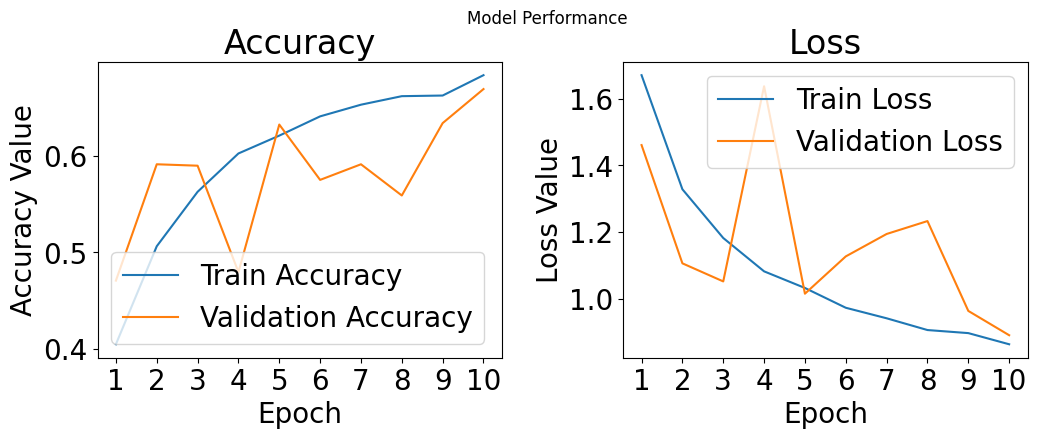

In [ ]:
from matplotlib import pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history2.history['categorical_accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history2.history['categorical_accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history2.history['val_categorical_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history2.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history2.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

['Bari_4', 'Bari_1', 'Red_Dacca', 'Bari_2', 'Shobri_Cola', 'Bari_3']
Generating True Vector:
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

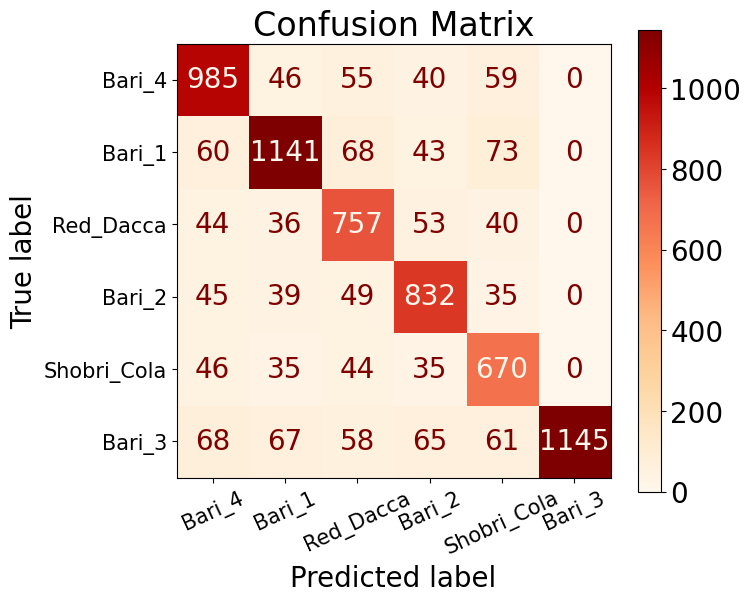

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import os


# Defining list with labels
labels = ['Bari_4', 'Bari_1', 'Red_Dacca', 'Bari_2', 'Shobri_Cola', 'Bari_3']


y_true = []
path = '/content/banana_dataset'
for x, y, z in os.walk(path):
  if len(z) == 0:
      continue
  x = x.split('/')
  index = labels.index(x[-1])
  for j in range(1, len(z)+1, 1):
    y_true.append(index)

print(labels)
print("Generating True Vector:\n", y_true, "\n")
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)
print('classes indexes:' , classesIndexes)
print('classes frequency:', classesFrequency)

y_predicted = np.copy(y_true)

ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)
for i in ii:
    y_predicted[i] = np.random.randint(low=0, high=5, dtype=int)

c_m = confusion_matrix(y_true, y_predicted)
print("\nConfusion Matrix:\n", c_m, "\n\n\n")


%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (7.0, 6.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)

# Showing the plot
plt.show()

In [ ]:
confusion_matrix_graph = confusion_matrix(y_true, y_predicted)
classification_matrix_report = classification_report(y_true, y_predicted)
print("\nClassification Report:\n", classification_matrix_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1185
           1       0.84      0.82      0.83      1385
           2       0.73      0.81      0.77       930
           3       0.78      0.83      0.80      1000
           4       0.71      0.81      0.76       830
           5       1.00      0.78      0.88      1464

    accuracy                           0.81      6794
   macro avg       0.81      0.82      0.81      6794
weighted avg       0.83      0.81      0.82      6794



22/22 [==============================] - 4s 144ms/step


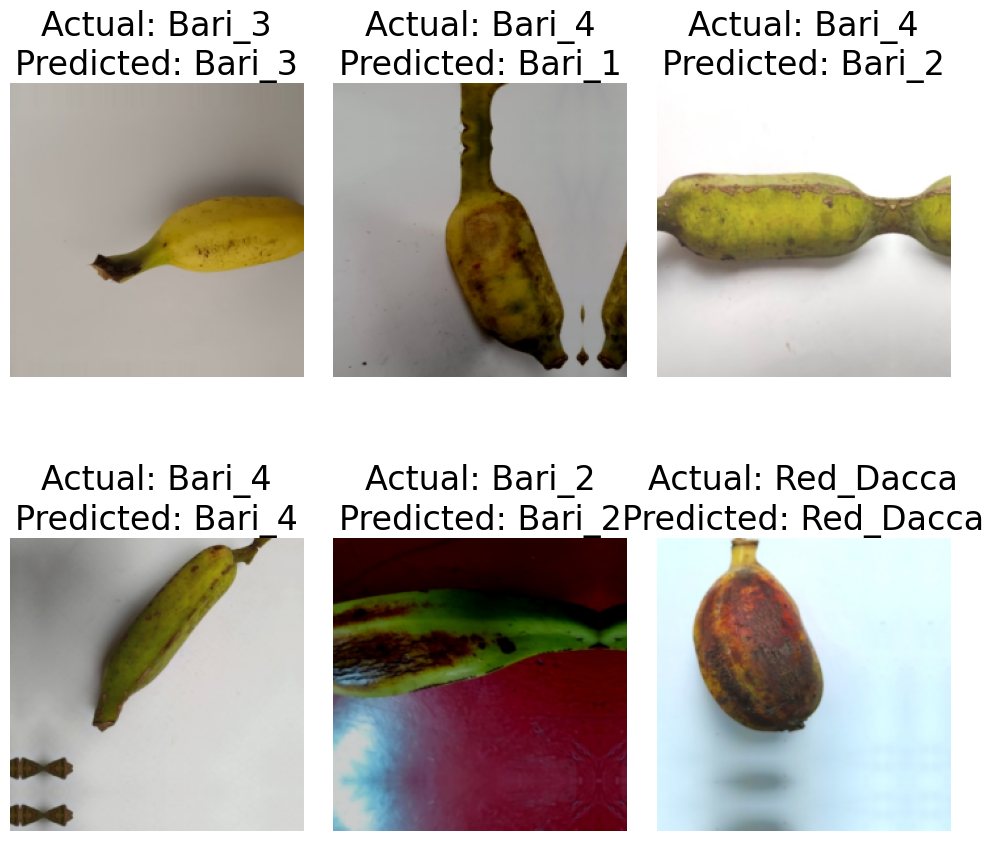

In [ ]:
### Using Exception Model
# Let’s show some good predictions from transfer model.

import numpy as np
import matplotlib.pyplot as plt

# predict the labels agianst x_test
y_predict = model2.predict(X_test)

# Reverse label encoding
reverse_encoded_labels = le.inverse_transform(np.argmax(y_test, axis=1))

# Reverse one-hot encoding for predicted labels
reverse_predicted_labels = le.inverse_transform(np.argmax(y_predict, axis=1))

# Plotting images with labels
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# Convert BGR image to RGB

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB))
    ax.set_title(f'Actual: {reverse_encoded_labels[i]}\nPredicted: {reverse_predicted_labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

##EfficientNet

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Load the pretrained EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model (if needed)
for layer in base_model.layers:
    layer.trainable = False

# Create a new top model
flatten = layers.Flatten()(base_model.output)
dense1 = layers.Dense(512, activation='relu')(flatten)
batch_norm1 = layers.BatchNormalization()(dense1)
dropout1 = layers.Dropout(0.5)(batch_norm1)
dense2 = layers.Dense(256, activation='relu')(dropout1)
batch_norm2 = layers.BatchNormalization()(dense2)
dropout2 = layers.Dropout(0.2)(batch_norm2)
output_layer = layers.Dense(n_classes, activation='softmax')(dropout2)

# Combine the base model and the new top model
model3 = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model3.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=[CategoricalAccuracy()])

# Print the model summary
model3.summary()


16705208/16705208 [==============================] - 0s 0us/step


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_5[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]'] 

In [ ]:
### Using Efficient Model
history3 = model3.fit(X_train,y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test) )

Epoch 1/10
192/192 [==============================] - 26s 94ms/step - loss: 0.8717 - categorical_accuracy: 0.6912 - val_loss: 0.4195 - val_categorical_accuracy: 0.8544
Epoch 2/10
192/192 [==============================] - 15s 76ms/step - loss: 0.3410 - categorical_accuracy: 0.8754 - val_loss: 0.3576 - val_categorical_accuracy: 0.8824
Epoch 3/10
192/192 [==============================] - 15s 76ms/step - loss: 0.2044 - categorical_accuracy: 0.9285 - val_loss: 0.2620 - val_categorical_accuracy: 0.9103
Epoch 4/10
192/192 [==============================] - 15s 76ms/step - loss: 0.1412 - categorical_accuracy: 0.9473 - val_loss: 0.2362 - val_categorical_accuracy: 0.9294
Epoch 5/10
192/192 [==============================] - 14s 75ms/step - loss: 0.1250 - categorical_accuracy: 0.9568 - val_loss: 0.2279 - val_categorical_accuracy: 0.9221
Epoch 6/10
192/192 [==============================] - 14s 75ms/step - loss: 0.0922 - categorical_accuracy: 0.9668 - val_loss: 0.2345 - val_categorical_accuracy:

In [ ]:
print("Test_Accuracy of EfficientNet: {:.2f}%".format(model3.evaluate(X_test, y_test)[1]*100))

22/22 [==============================] - 1s 60ms/step - loss: 0.2429 - categorical_accuracy: 0.9250
Test_Accuracy of EfficientNet: 92.50%


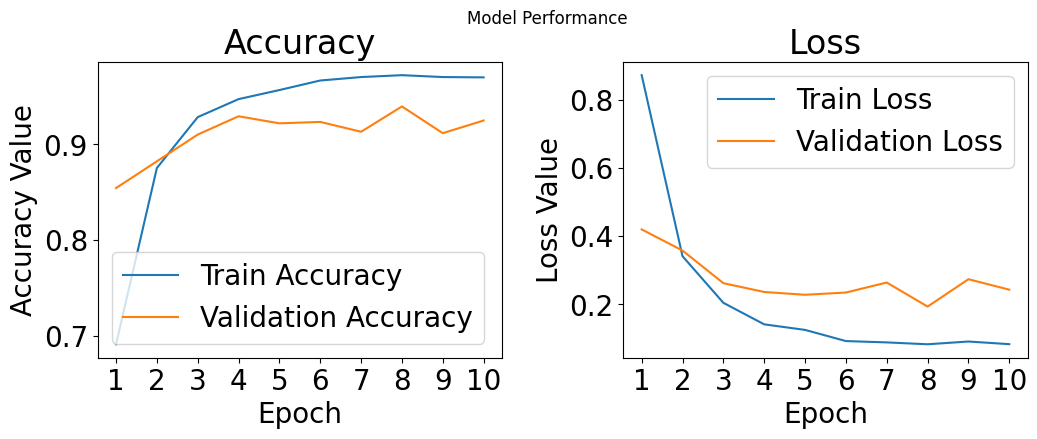

In [ ]:
from matplotlib import pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history3.history['categorical_accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history3.history['categorical_accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history3.history['val_categorical_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history3.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history3.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

['Bari_4', 'Bari_1', 'Red_Dacca', 'Bari_2', 'Shobri_Cola', 'Bari_3']
Generating True Vector:
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

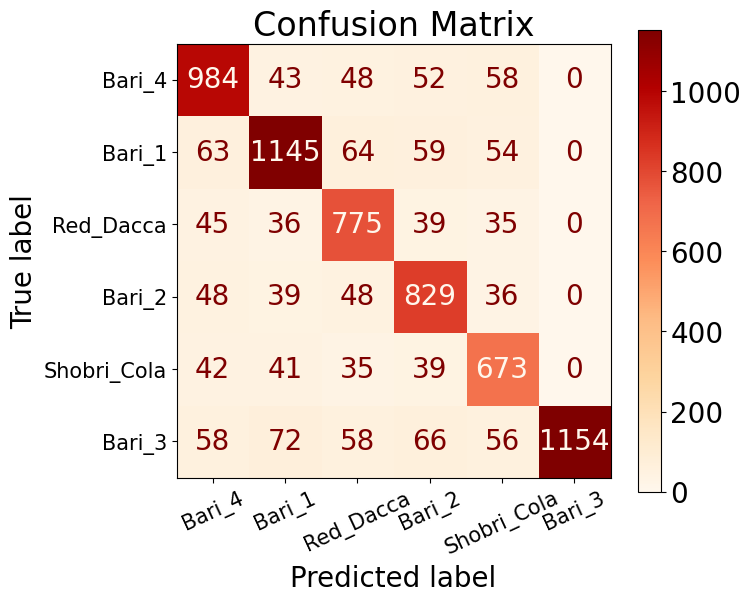

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import os


# Defining list with labels
labels = ['Bari_4', 'Bari_1', 'Red_Dacca', 'Bari_2', 'Shobri_Cola', 'Bari_3']


y_true = []
path = '/content/banana_dataset'
for x, y, z in os.walk(path):
  if len(z) == 0:
      continue
  x = x.split('/')
  index = labels.index(x[-1])
  for j in range(1, len(z)+1, 1):
    y_true.append(index)

print(labels)
print("Generating True Vector:\n", y_true, "\n")
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)
print('classes indexes:' , classesIndexes)
print('classes frequency:', classesFrequency)

y_predicted = np.copy(y_true)

ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)
for i in ii:
    y_predicted[i] = np.random.randint(low=0, high=5, dtype=int)

c_m = confusion_matrix(y_true, y_predicted)
print("\nConfusion Matrix:\n", c_m, "\n\n\n")


%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (7.0, 6.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)

# Showing the plot
plt.show()

In [ ]:
confusion_matrix_graph = confusion_matrix(y_true, y_predicted)
classification_matrix_report = classification_report(y_true, y_predicted)
print("\nClassification Report:\n", classification_matrix_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1185
           1       0.83      0.83      0.83      1385
           2       0.75      0.83      0.79       930
           3       0.76      0.83      0.80      1000
           4       0.74      0.81      0.77       830
           5       1.00      0.79      0.88      1464

    accuracy                           0.82      6794
   macro avg       0.81      0.82      0.81      6794
weighted avg       0.83      0.82      0.82      6794



###InceptionV3

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.applications import InceptionV3

# Load the pretrained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model (if needed)
for layer in base_model.layers:
    layer.trainable = False

# Add Global Average Pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Create a custom top model
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
output_layer = Dense(n_classes, activation='softmax')(x)

# Combine the base model and the new top model
model4 = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model4.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy', metrics=[CategoricalAccuracy()])

# Print the model summary
model4.summary()


87910968/87910968 [==============================] - 0s 0us/step


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 111, 111, 32)         864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization_10 (Ba  (None, 111, 111, 32)         96        ['conv2d_6[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization_10

In [ ]:
### Using InceptionV3 Model
history4 = model4.fit(X_train,y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test) )

Epoch 1/10
192/192 [==============================] - 25s 93ms/step - loss: 1.6935 - categorical_accuracy: 0.4061 - val_loss: 5.5844 - val_categorical_accuracy: 0.2897
Epoch 2/10
192/192 [==============================] - 16s 84ms/step - loss: 1.4376 - categorical_accuracy: 0.4748 - val_loss: 19.6838 - val_categorical_accuracy: 0.1353
Epoch 3/10
192/192 [==============================] - 15s 77ms/step - loss: 1.3494 - categorical_accuracy: 0.5043 - val_loss: 1.2916 - val_categorical_accuracy: 0.5088
Epoch 4/10
192/192 [==============================] - 16s 82ms/step - loss: 1.2978 - categorical_accuracy: 0.5216 - val_loss: 1.2406 - val_categorical_accuracy: 0.5441
Epoch 5/10
192/192 [==============================] - 14s 75ms/step - loss: 1.2596 - categorical_accuracy: 0.5242 - val_loss: 1.3340 - val_categorical_accuracy: 0.4941
Epoch 6/10
192/192 [==============================] - 16s 81ms/step - loss: 1.2194 - categorical_accuracy: 0.5330 - val_loss: 1.4889 - val_categorical_accuracy

In [ ]:
print("Test_Accuracy of InceptionV3: {:.2f}%".format(model4.evaluate(X_test, y_test)[1]*100))

22/22 [==============================] - 1s 65ms/step - loss: 1.4560 - categorical_accuracy: 0.4779
Test_Accuracy of InceptionV3: 47.79%


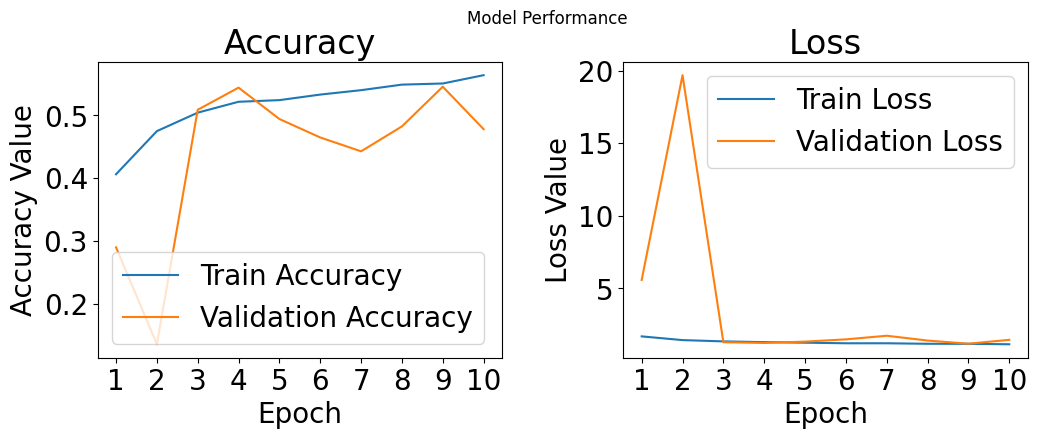

In [ ]:
from matplotlib import pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history4.history['categorical_accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history4.history['categorical_accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history4.history['val_categorical_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history4.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history4.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

['Bari_4', 'Bari_1', 'Red_Dacca', 'Bari_2', 'Shobri_Cola', 'Bari_3']
Generating True Vector:
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

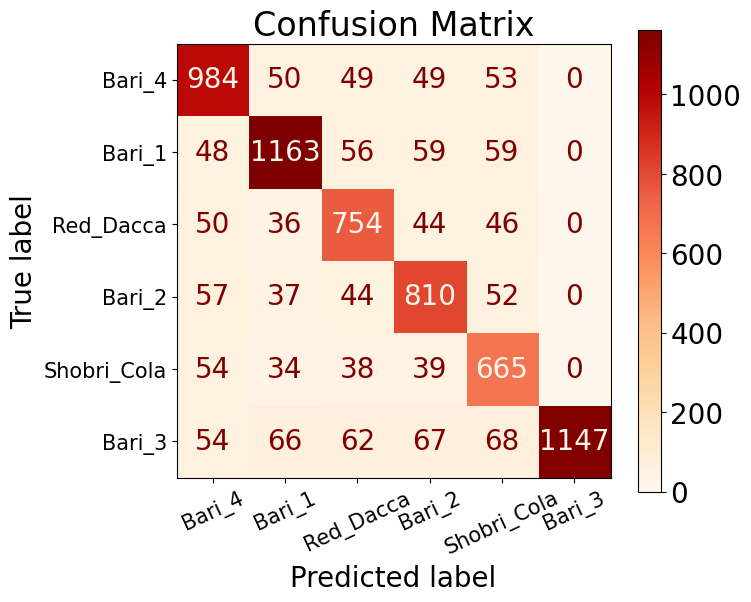

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import os


# Defining list with labels
labels = ['Bari_4', 'Bari_1', 'Red_Dacca', 'Bari_2', 'Shobri_Cola', 'Bari_3']


y_true = []
path = '/content/banana_dataset'
for x, y, z in os.walk(path):
  if len(z) == 0:
      continue
  x = x.split('/')
  index = labels.index(x[-1])
  for j in range(1, len(z)+1, 1):
    y_true.append(index)

print(labels)
print("Generating True Vector:\n", y_true, "\n")
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)
print('classes indexes:' , classesIndexes)
print('classes frequency:', classesFrequency)

y_predicted = np.copy(y_true)

ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)
for i in ii:
    y_predicted[i] = np.random.randint(low=0, high=5, dtype=int)

c_m = confusion_matrix(y_true, y_predicted)
print("\nConfusion Matrix:\n", c_m, "\n\n\n")


%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (7.0, 6.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)

# Showing the plot
plt.show()

In [ ]:
confusion_matrix_graph = confusion_matrix(y_true, y_predicted)
classification_matrix_report = classification_report(y_true, y_predicted)
print("\nClassification Report:\n", classification_matrix_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1185
           1       0.84      0.84      0.84      1385
           2       0.75      0.81      0.78       930
           3       0.76      0.81      0.78      1000
           4       0.71      0.80      0.75       830
           5       1.00      0.78      0.88      1464

    accuracy                           0.81      6794
   macro avg       0.81      0.81      0.81      6794
weighted avg       0.82      0.81      0.82      6794



###ResNet50


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
# Load the pretrained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model (if needed)
for layer in base_model.layers:
    layer.trainable = False

# Add Global Average Pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Create a custom top model
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)
output_layer = Dense(n_classes, activation='softmax')(x)

# Combine the base model and the new top model
model5 = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model5.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=[CategoricalAccuracy()])

# Print the model summary
model5.summary()

94765736/94765736 [==============================] - 0s 0us/step


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_7[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
### Using Efficient Model
history5 = model5.fit(X_train,y_train, batch_size=32, epochs=10, validation_data=(X_test,y_test) )

Epoch 1/10
192/192 [==============================] - 33s 135ms/step - loss: 0.4915 - categorical_accuracy: 0.8296 - val_loss: 0.2083 - val_categorical_accuracy: 0.9132
Epoch 2/10
192/192 [==============================] - 22s 114ms/step - loss: 0.2266 - categorical_accuracy: 0.9200 - val_loss: 0.1698 - val_categorical_accuracy: 0.9426
Epoch 3/10
192/192 [==============================] - 22s 114ms/step - loss: 0.1790 - categorical_accuracy: 0.9387 - val_loss: 0.1110 - val_categorical_accuracy: 0.9676
Epoch 4/10
192/192 [==============================] - 21s 110ms/step - loss: 0.1334 - categorical_accuracy: 0.9521 - val_loss: 0.1027 - val_categorical_accuracy: 0.9618
Epoch 5/10
192/192 [==============================] - 22s 113ms/step - loss: 0.1273 - categorical_accuracy: 0.9544 - val_loss: 0.1216 - val_categorical_accuracy: 0.9603
Epoch 6/10
192/192 [==============================] - 22s 112ms/step - loss: 0.1084 - categorical_accuracy: 0.9603 - val_loss: 0.0733 - val_categorical_acc

In [ ]:
print("Test_Accuracy of ResNet50: {:.2f}%".format(model5.evaluate(X_test, y_test)[1]*100))

22/22 [==============================] - 2s 94ms/step - loss: 0.0650 - categorical_accuracy: 0.9809
Test_Accuracy of ResNet50: 98.09%


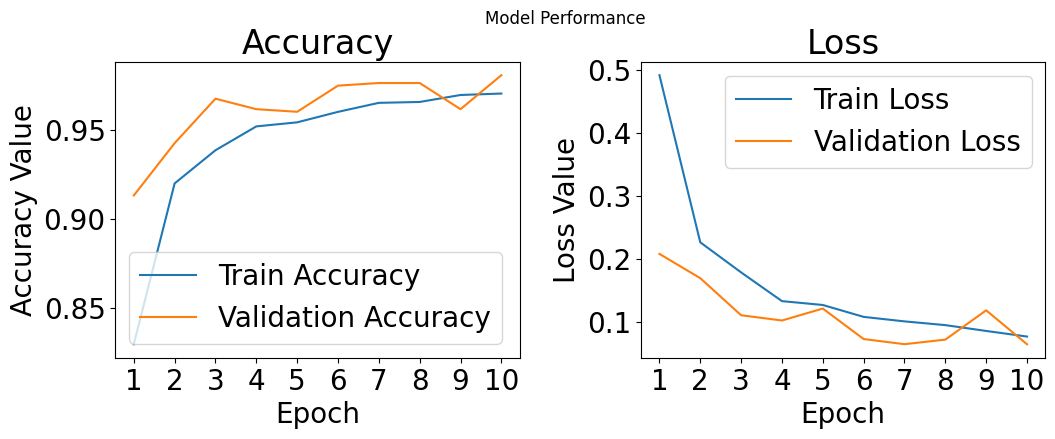

In [ ]:
from matplotlib import pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history5.history['categorical_accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history5.history['categorical_accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history5.history['val_categorical_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history5.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history5.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

confusion_matrix

['Bari_4', 'Bari_1', 'Red_Dacca', 'Bari_2', 'Shobri_Cola', 'Bari_3']
Generating True Vector:
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

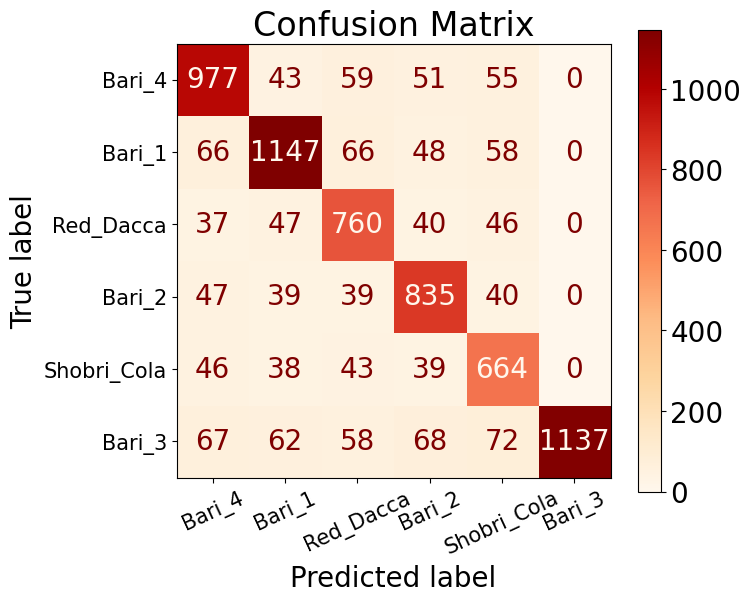

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import os


# Defining list with labels
labels = ['Bari_4', 'Bari_1', 'Red_Dacca', 'Bari_2', 'Shobri_Cola', 'Bari_3']


y_true = []
path = '/content/banana_dataset'
for x, y, z in os.walk(path):
  if len(z) == 0:
      continue
  x = x.split('/')
  index = labels.index(x[-1])
  for j in range(1, len(z)+1, 1):
    y_true.append(index)

print(labels)
print("Generating True Vector:\n", y_true, "\n")
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)
print('classes indexes:' , classesIndexes)
print('classes frequency:', classesFrequency)

y_predicted = np.copy(y_true)

ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)
for i in ii:
    y_predicted[i] = np.random.randint(low=0, high=5, dtype=int)

c_m = confusion_matrix(y_true, y_predicted)
print("\nConfusion Matrix:\n", c_m, "\n\n\n")


%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (7.0, 6.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)

# Showing the plot
plt.show()

Classification Report

In [ ]:
confusion_matrix_graph = confusion_matrix(y_true, y_predicted)
classification_matrix_report = classification_report(y_true, y_predicted)
print("\nClassification Report:\n", classification_matrix_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81      1185
           1       0.83      0.83      0.83      1385
           2       0.74      0.82      0.78       930
           3       0.77      0.83      0.80      1000
           4       0.71      0.80      0.75       830
           5       1.00      0.78      0.87      1464

    accuracy                           0.81      6794
   macro avg       0.81      0.81      0.81      6794
weighted avg       0.82      0.81      0.81      6794



Comparison (5 model) graph/bar chart

In [ ]:
# model1 = tf.keras.Model.load_weights('/content/drive/MyDrive/Colab Notebooks/SavedModels/VGG_16.h5')
# model2 = tf.keras.Model.load_weights('/content/drive/MyDrive/Colab Notebooks/SavedModels/Xception.h5')
# model3 = tf.keras.Model.load_weights('/content/drive/MyDrive/Colab Notebooks/SavedModels/EfficientNet.h5')
# model4 = tf.keras.Model.load_weights('/content/drive/MyDrive/Colab Notebooks/SavedModels/InceptionV3.h5')
# model5 = tf.keras.Model.load_weights('/content/drive/MyDrive/Colab Notebooks/SavedModels/ResNet_50.h5')

In [ ]:
data1 = model.evaluate(X_test, y_test)[1]*100
data2 = model2.evaluate(X_test, y_test)[1]*100
data3 = model3.evaluate(X_test, y_test)[1]*100
data4 = model4.evaluate(X_test, y_test)[1]*100
data5 = model5.evaluate(X_test, y_test)[1]*100

22/22 [==============================] - 2s 99ms/step - loss: 0.0650 - categorical_accuracy: 0.9809


In [ ]:
print(type(data1))
print(data2)
print(data3)
print(data4)
print(data5)

<class 'float'>
66.91176295280457
92.5000011920929
47.79411852359772
98.08823466300964


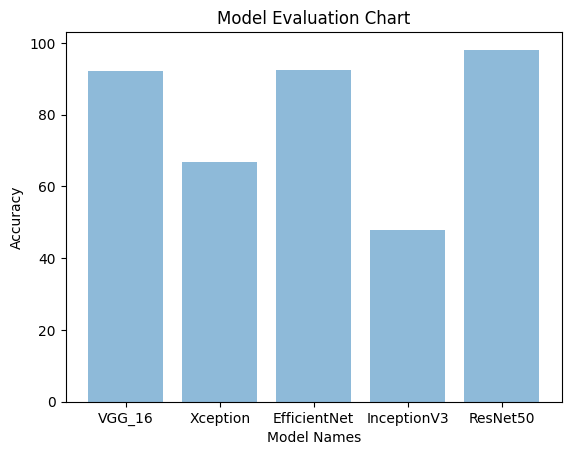

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('VGG_16', 'Xception', 'EfficientNet', 'InceptionV3', 'ResNet50' )
y_pos = np.arange(len(objects))

performance = [data1,data2,data3,data4,data5]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.xlabel('Model Names')
plt.title('Model Evaluation Chart')

plt.show()

In [ ]:
index

1